<a href="https://colab.research.google.com/github/Ahsan-Ali20/200901025_Machine_Learning/blob/main/Laptop_Price_Prediction_Project_200901025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#==============================================================
#.  **Name: Muahmmad Ahsan Ali**
#.  **Reg Number: 200901025**
#.  **Section: A**
#.  **Course: Machine Learning**
#.  **Project Name: LAPTOP PRICE PREDICTOR**
#==============================================================


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/200901025_ML_PROJECT/Ahsan_Ali_Machine_Learning_Project

/content/drive/MyDrive/200901025_ML_PROJECT/Ahsan_Ali_Machine_Learning_Project


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [4]:

# Read data from an Excel file into a Pandas DataFrame
data = pd.read_excel('/content/drive/MyDrive/200901025_ML_PROJECT/Ahsan_ML_Project_02/laptop_data.xlsx')

# Display the DataFrame, showing the first few and last few rows
data


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200



> =============================================
> # **Preprocessing**
> =============================================




---


> ##  **Data Quality Assessment (DQA)**


---




In [5]:
# Display the shape of the DataFrame (number of rows and columns)
data.shape


(1303, 12)

In [6]:
# Display information about the DataFrame, including the data types and non-null counts
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
# Check for duplicate rows in the DataFrame
# The method data.duplicated() returns a boolean Series indicating whether each row is a duplicate of a previous row.
# The method sum() then counts the number of True values in the Series, representing the number of duplicated rows.
data.duplicated().sum()


0

In [8]:
# Check for missing (null) values in the DataFrame
# The method data.isnull() returns a DataFrame of the same shape as 'data' with True for missing values and False for non-missing values.
# The method sum() then sums the number of missing values in each column.
data.isnull().sum()


Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


> =============================================
> # **Data Cleaning**
> =============================================



> ===============================================================
> ## **Tasks which I perform for Data Cleaning**

> - Delete First column Unnamed:0
> - Remove string data from screen resolution column
> - Remove GB from ram and make it int32
> - Remove kg from weight and make it float
> - Make price as int

> ===============================================================


In [9]:
# Drop the first column 'Unnamed: 0' in place
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
# Remove 'GB' from the 'Ram' column and convert it to int32
data['Ram'] = data['Ram'].str.replace('GB','').astype('int32')

# Remove 'kg' from the 'Weight' column and convert it to float32
data['Weight'] = data['Weight'].str.replace('kg','').astype('float32')

# Convert 'Price' column to int
data['Price'] = data['Price'].astype(int)


In [11]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095


In [12]:
# Checking unique values in the 'Company' column after data cleaning
data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [13]:
# Checking unique values in the 'TypeName' column after data cleaning
data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [14]:
# Checking unique values in the 'Inches' column after data cleaning
data['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [15]:
# Checking unique values in the 'ScreenResolution' column after data cleaning
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [16]:
# Checking unique values in the 'Cpu' column after data cleaning
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du


> =============================================
> # **Exploratory Data Analysis (EDA)**
> =============================================


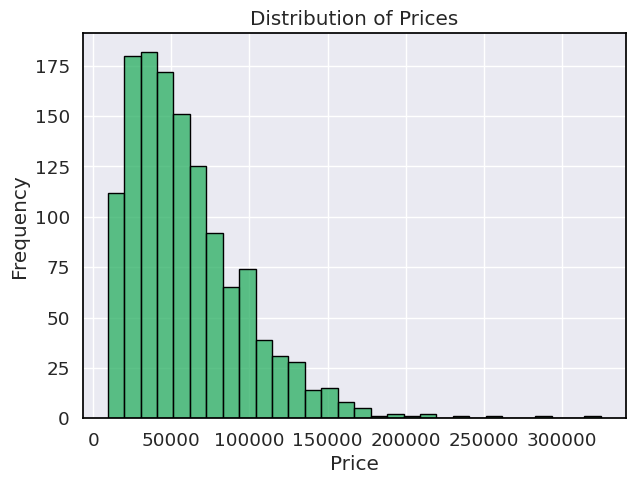

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Price' is the column you want to visualize

custom_palette = ["#27ae60", "#9b59b6"]

# Set style and context for the plot
sns.set(style="darkgrid")

sns.set_palette(custom_palette)
sns.set_context("notebook", font_scale=1.2)

# Create the distribution plot using histplot
plt.figure(figsize=(7, 5))
sns.histplot(data['Price'], kde=False, bins=30, edgecolor="black", linewidth=1)

# Set plot labels and title
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Show the plot
plt.show()


<ipython-input-18-4601866dab47>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Company', data=data, palette='muted')


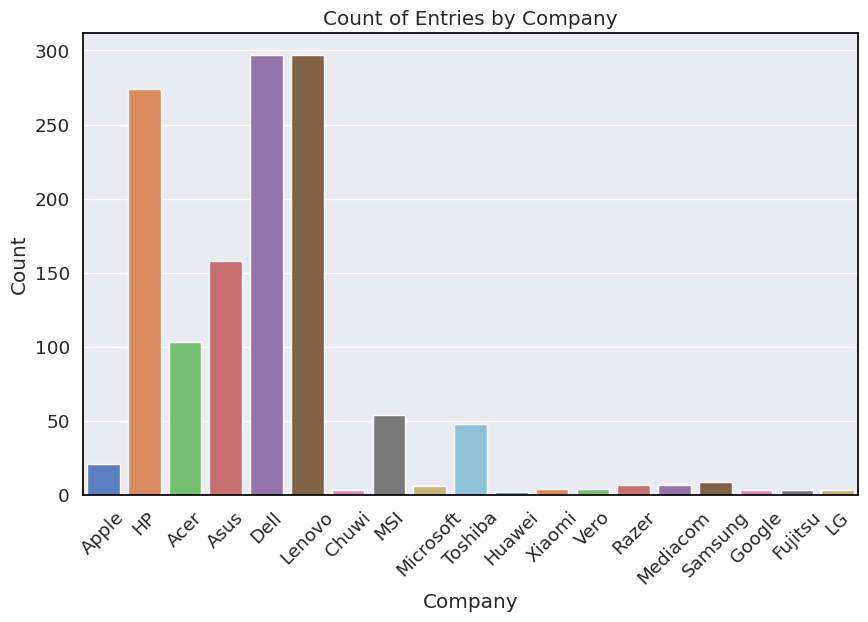

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Company' is the column you want to visualize

# Set style and context for the plot
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using a Seaborn built-in palette
plt.figure(figsize=(10, 6))
sns.countplot(x='Company', data=data, palette='muted')

# Set plot labels and title
plt.title("Count of Entries by Company")
plt.xlabel("Company")
plt.ylabel("Count")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Show the plot
plt.show()


<ipython-input-19-f7bb716d1c6d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='Price', data=data, palette='muted')


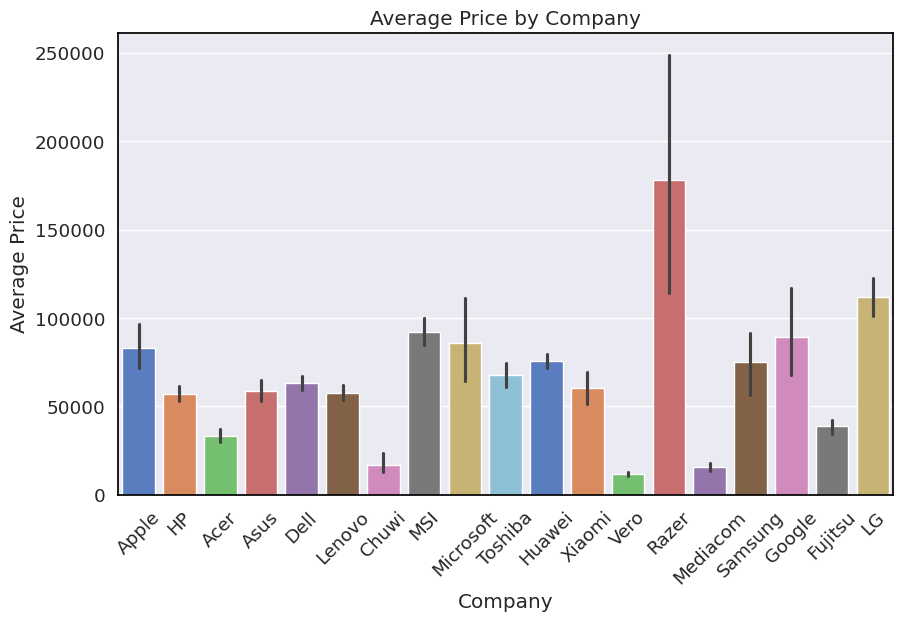

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Company' and 'Price' are the columns you want to visualize


# Set style and context for the plot
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn with a custom color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Price', data=data, palette='muted')

# Set plot labels and title
plt.title("Average Price by Company")
plt.xlabel("Company")
plt.ylabel("Average Price")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Show the plot
plt.show()


<ipython-input-20-a15c3ebc3cc3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TypeName', data=data, palette='viridis')  # 'viridis' is an example color palette


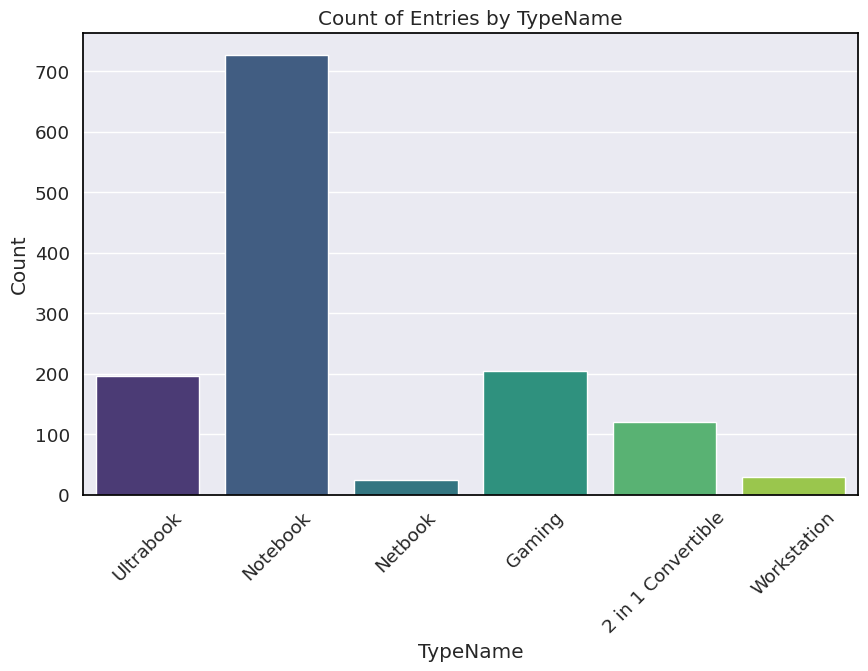

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'TypeName' is the column you want to visualize

# Set style and context for the plot
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='TypeName', data=data, palette='viridis')  # 'viridis' is an example color palette

# Set plot labels and title
plt.title("Count of Entries by TypeName")
plt.xlabel("TypeName")
plt.ylabel("Count")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


<ipython-input-21-ae91846e49ae>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TypeName', y='Price', data=data, palette='muted')  # 'viridis' is an example color palette


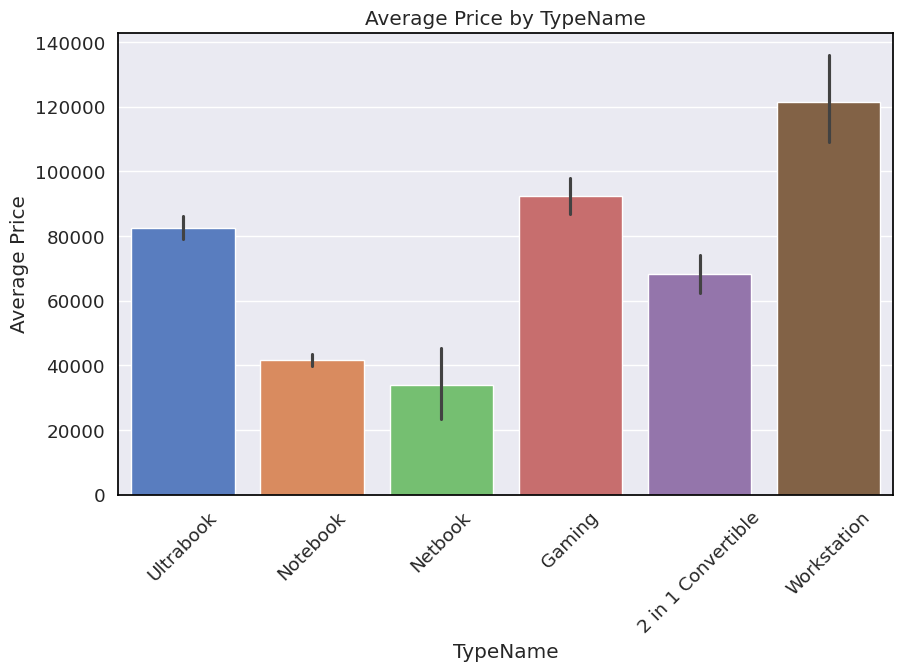

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'TypeName' and 'Price' are the columns you want to visualize

# Set style and context for the plot
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='TypeName', y='Price', data=data, palette='muted')  # 'viridis' is an example color palette

# Set plot labels and title
plt.title("Average Price by TypeName")
plt.xlabel("TypeName")
plt.ylabel("Average Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

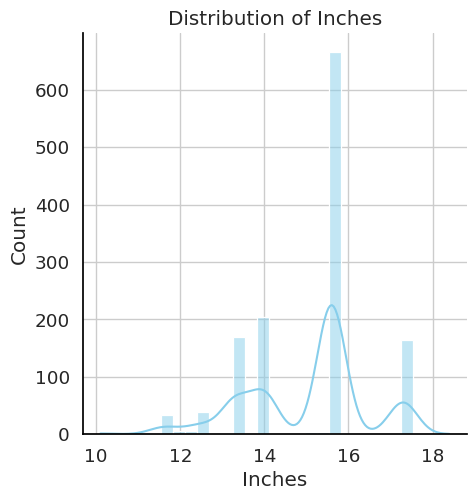

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Inches' is the column you want to visualize

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the distribution plot using Seaborn's displot
plt.figure(figsize=(10, 6))
sns.displot(data['Inches'], kde=True, color='skyblue')

# Set plot labels and title
plt.title("Distribution of Inches")
plt.xlabel("Inches")
plt.ylabel("Count")
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


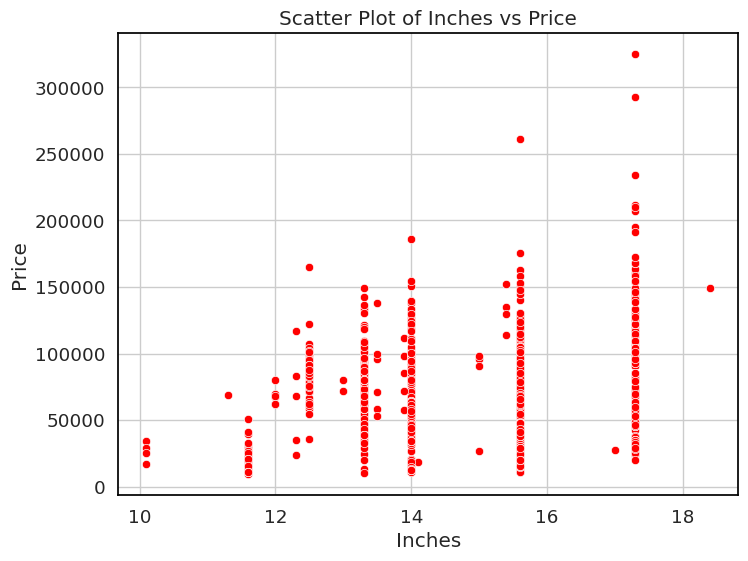

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Inches' and 'Price' are the columns you want to visualize

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the scatter plot using Seaborn's scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Inches', y='Price', data=data, color='red')

# Set plot labels and title
plt.title("Scatter Plot of Inches vs Price")
plt.xlabel("Inches")
plt.ylabel("Price")
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


In [24]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [25]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [26]:
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1155,HP,Notebook,15.6,Full HD 1920x1080,AMD A6-Series A6-9220 2.5GHz,4,256GB SSD,AMD Radeon 520,Windows 10,1.91,25515,0
978,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.04,30849,0
335,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,67559,0
570,HP,Workstation,17.3,1600x900,Intel Core i5 7440HQ 2.8GHz,8,500GB HDD,Nvidia Quadro M1200,Windows 10,3.14,99153,0
1184,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,6,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.18,42570,0
1051,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,1.91,52161,0
349,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,AMD Radeon 530,Windows 10,1.90,35324,0
838,Lenovo,Notebook,14.0,1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.50,17316,0
917,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,85194,0
683,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 520,Windows 10,2.50,37242,0


<ipython-input-27-5b6b88445ef5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Touchscreen', data=data, palette='pastel')  # 'pastel' is an example color palette


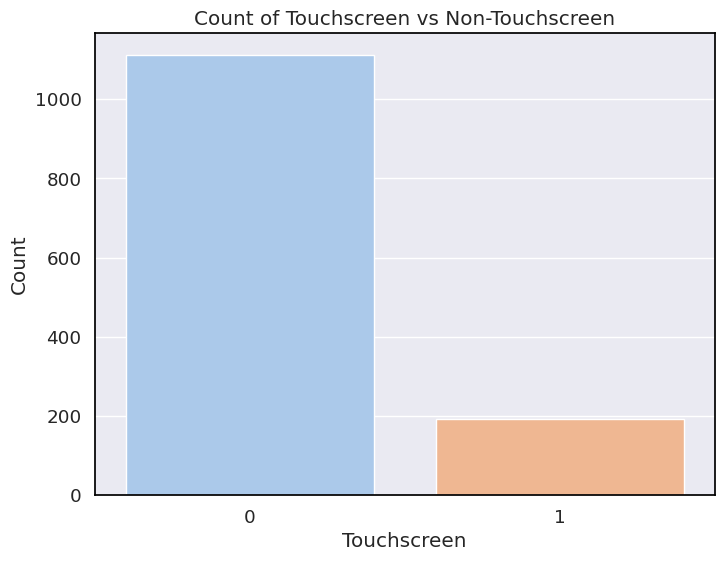

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Touchscreen' is the column you want to visualize

# Set style and context for the plot
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Touchscreen', data=data, palette='pastel')  # 'pastel' is an example color palette

# Set plot labels and title
plt.title("Count of Touchscreen vs Non-Touchscreen")
plt.xlabel("Touchscreen")
plt.ylabel("Count")
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


<ipython-input-28-ccb06b61c8ee>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Touchscreen'],y=data['Price'],data=data, palette='pastel')


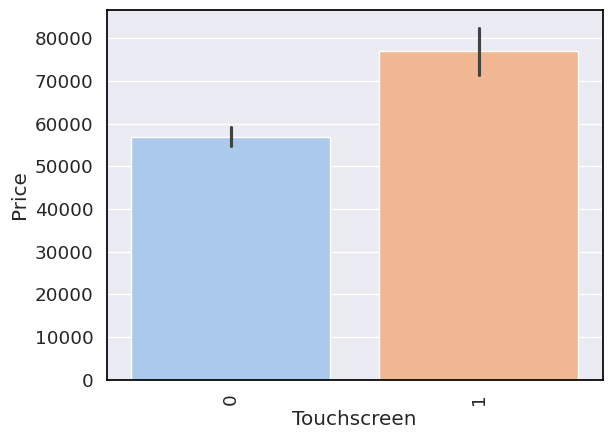

In [28]:
sns.barplot(x=data['Touchscreen'],y=data['Price'],data=data, palette='pastel')
plt.xticks(rotation='vertical')
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.show()

In [29]:
# Adding a new column 'IPS' based on the presence of 'IPS' in the 'ScreenResolution' column
data['IPS']=data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [30]:
data.sample(6)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
1035,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.26,71874,0,0
901,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 256GB SSD,Nvidia GeForce GTX 980M,Windows 10,3.58,68145,0,1
754,Asus,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.37,45282,0,0
194,Dell,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,1.62,44701,1,1
347,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8650U 1.9GHz,16,512GB SSD + 256GB SSD,Intel UHD Graphics 620,Windows 10,1.88,85672,0,0
737,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,1.55,35111,1,0


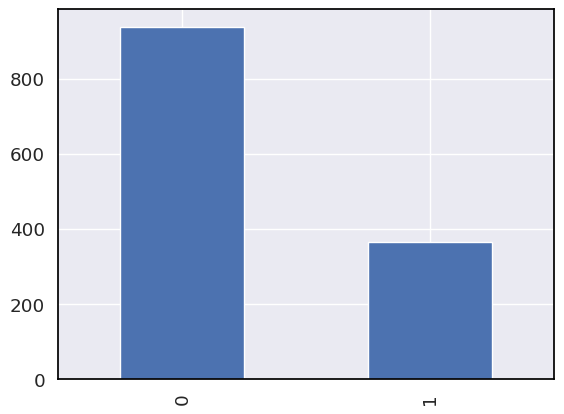

In [31]:
data['IPS'].value_counts().plot(kind='bar')
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

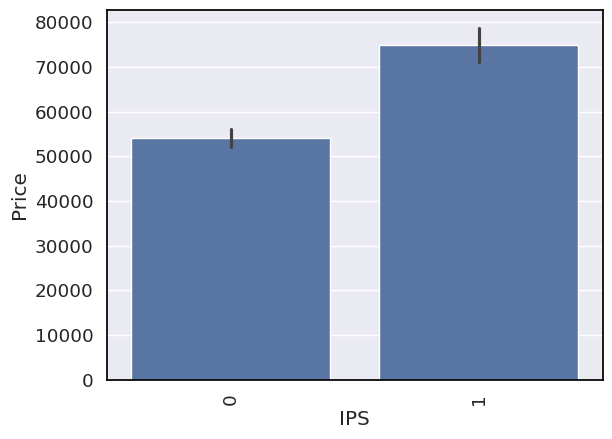

In [32]:
sns.barplot(x=data['IPS'],y=data['Price'])
plt.xticks(rotation='vertical')
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.show()

In [33]:
# Split the 'ScreenResolution' column into two new columns, 'x_res' and 'y_res'
new=data['ScreenResolution'].str.split('x',n=1,expand = True)
#It uses the str.split method to split the 'ScreenResolution' column into two new columns, 'new_0' and 'new_1', using 'x' as the delimiter.

In [34]:
# Assign the split parts to new columns in the original DataFrame
data['x_res'] = new[0] # Values before 'x' (width resolution)
data['y_res'] = new[1] # Values after 'x' (height resolution)
# Display the first few rows of the updated DataFrame
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,IPS Panel Retina Display 2560,1600


In [35]:
# Remove commas and extract numerical values from the 'x_res' column
data['x_res'] = data['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [36]:
# Display the first few rows of the DataFrame
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560,1600


In [37]:
# Converting the 'x_res' and 'y_res' columns to integer type
data['x_res'] = data['x_res'].astype(int)
data['y_res'] = data['y_res'].astype(int)

In [38]:
# Calculating the pixel density (PPI) and adding a new 'ppi' column to the DataFrame
data['ppi'] = (((data['x_res']**2) + (data['y_res']**2))**0.5/data['Inches']).astype(float)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   int64  
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64

In [40]:
# Drop specified columns from the DataFrame
# The 'ScreenResolution', 'Inches', 'x_res', and 'y_res' columns are being removed
# These columns might have been dropped because relevant information has been extracted or they are not needed for the analysis
# The 'inplace=True' parameter ensures that the changes are made directly to the original DataFrame without the need for assignment
data.drop(columns=['ScreenResolution','Inches','x_res','y_res'],inplace=True)

In [41]:
# Display the first few rows of the DataFrame after dropping columns
# This helps in inspecting the modified DataFrame and checking if the changes were applied correctly

data.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005


In [42]:
# Display the value counts for the 'Cpu' column
data['Cpu'].value_counts()


Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [43]:
# Extracting the CPU name from the 'Cpu' column and creating a new 'Cpu Name' column
data['Cpu Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [44]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5


In [45]:
def fetch_processor(text):
    # Check if the CPU name is 'Intel Core i5', 'Intel Core i7', or 'Intel Core i3'
    if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
        return text
    else:
        # If the CPU is from Intel but not one of the specified, categorize as 'Other Intel Processor'
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            # If the CPU is from AMD, categorize as 'AMD Processor'
            return 'AMD Processor'


In [46]:
# Apply the fetch_processor function to create a new column 'Cpu brand' based on 'Cpu Name'
data['Cpu brand'] = data['Cpu Name'].apply(fetch_processor)
# Display a sample of 7 rows from the updated DataFrame
data.sample(7)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu brand
344,Dell,Ultrabook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,84129,0,0,165.632118,Intel Core i7,Intel Core i7
487,Dell,Notebook,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,101178,0,0,141.211998,Intel Core i7,Intel Core i7
551,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.90,59513,0,0,141.211998,Intel Core i5,Intel Core i5
1203,Dell,Ultrabook,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.20,142790,1,0,276.053530,Intel Core i7,Intel Core i7
1246,Dell,Notebook,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.60,46620,0,0,111.935204,Intel Core i5,Intel Core i5
759,Acer,Notebook,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.10,31914,0,0,100.454670,Intel Core i5,Intel Core i5
25,Dell,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.30,22305,0,0,100.454670,Intel Core i3,Intel Core i3


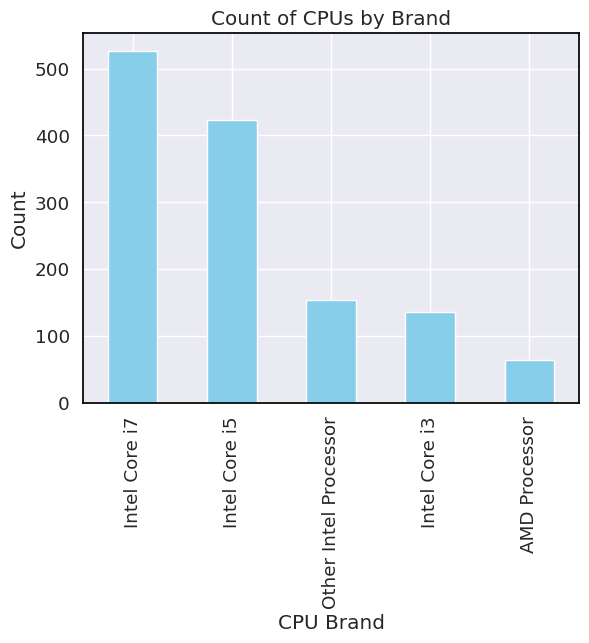

In [47]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Cpu brand' is the column you want to visualize

# Create the bar plot
data['Cpu brand'].value_counts().plot(kind='bar', color='skyblue')

# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Set plot labels and title
plt.title("Count of CPUs by Brand")
plt.xlabel("CPU Brand")
plt.ylabel("Count")

# Show the plot
plt.show()


<ipython-input-48-5ce8a2db50cb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cpu brand', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette


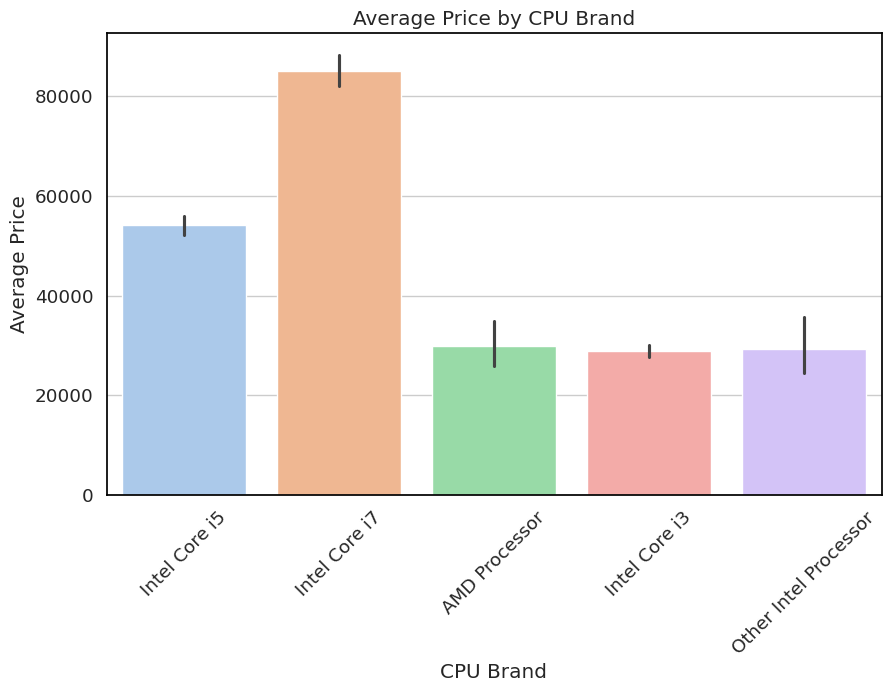

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Cpu brand' and 'Price' are the columns you want to visualize

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Cpu brand', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette

# Set plot labels and title
plt.title("Average Price by CPU Brand")
plt.xlabel("CPU Brand")
plt.ylabel("Average Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


In [49]:
# Drop unnecessary columns 'Cpu' and 'Cpu Name'
data.drop(columns=['Cpu','Cpu Name'],inplace=True)
# Display the updated DataFrame
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5


<ipython-input-50-5ad9536f318b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ram', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette


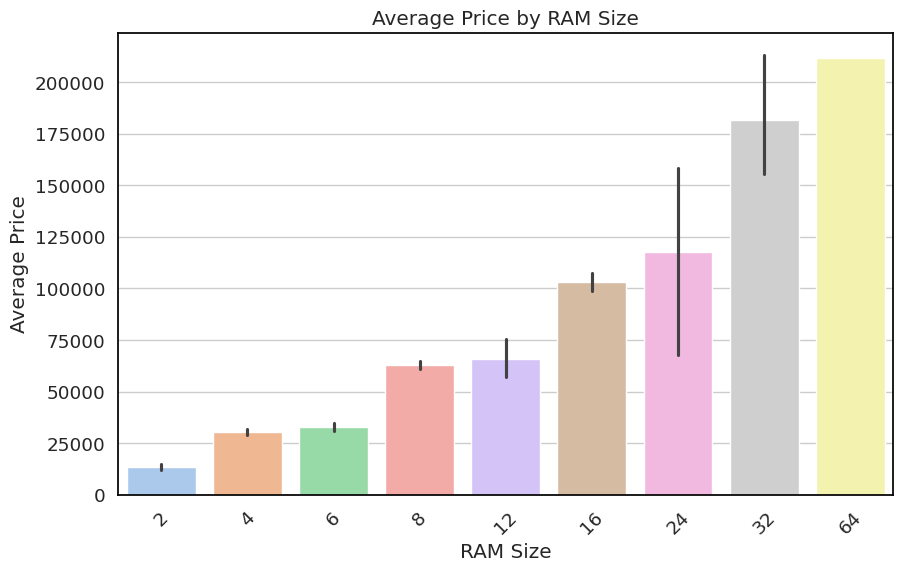

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Ram' and 'Price' are the columns you want to visualize

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Ram', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette

# Set plot labels and title
plt.title("Average Price by RAM Size")
plt.xlabel("RAM Size")
plt.ylabel("Average Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


In [51]:
# Display the count of unique values in the 'Memory' column
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5



---


> ##  **Data Cleaning**


---




In [52]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

data["first"]= new[0]
data["first"]= data["first"].str.strip()

data["second"]= new[1]

data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage','Memory','Hybrid','Flash_Storage'],inplace=True)


<ipython-input-52-3dd6318f8889>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D', '')
<ipython-input-52-3dd6318f8889>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second'] = data['second'].str.replace(r'\D', '')


In [53]:
data.sample(7)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD
51,Acer,Notebook,8,Nvidia GeForce MX150,Windows 10,2.20,44808,0,1,141.211998,Intel Core i7,0,256
211,Asus,Gaming,16,Nvidia GeForce GTX 1050,Windows 10,2.90,74964,0,0,127.335675,Intel Core i7,1000,256
633,Lenovo,Notebook,4,Nvidia GeForce 920MX,Windows 10,2.20,30849,0,0,141.211998,Intel Core i3,1000,0
245,Dell,Notebook,8,AMD Radeon 530,Windows 10,2.20,52480,0,0,141.211998,Intel Core i7,2000,128
264,Dell,Notebook,8,AMD Radeon R5 M430,Windows 10,2.24,30103,0,0,141.211998,Intel Core i5,1000,0
1161,MSI,Gaming,16,Nvidia GeForce GTX 970M,Windows 10,1.70,94252,0,0,157.350512,Intel Core i7,1000,256
406,Toshiba,Ultrabook,16,Intel HD Graphics 520,Windows 10,1.20,93080,0,0,165.632118,Intel Core i7,0,512


In [54]:
# Calculate the correlation coefficients between 'Price' and other numeric columns
data.corr()['Price']

<ipython-input-54-72b7028ac64b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252207
ppi            0.473487
HDD           -0.096442
SSD            0.670799
Name: Price, dtype: float64

In [55]:
# Extract the brand information from the 'Gpu' column and create a new column 'Gpu brand'
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])
# Display the first few rows of the DataFrame to show the new column
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel


In [56]:
# Filter the DataFrame to exclude rows where 'Gpu brand' is 'ARM'
data = data[data['Gpu brand'] != 'ARM']
# Display the count of each unique value in the 'Gpu brand' column
data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

<ipython-input-57-e731c59b699a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gpu brand', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette


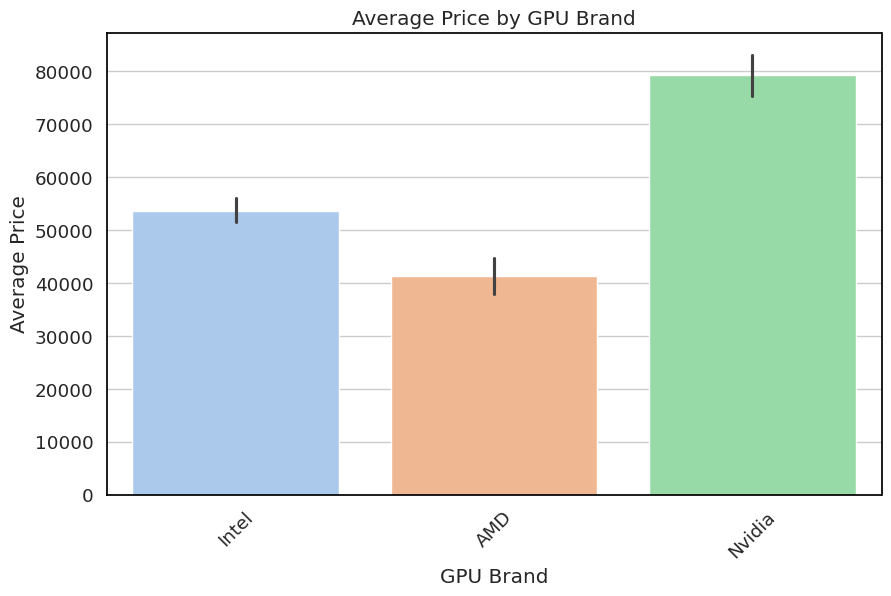

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Gpu brand' and 'Price' are the columns you want to visualize

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Gpu brand', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette

# Set plot labels and title
plt.title("Average Price by GPU Brand")
plt.xlabel("GPU Brand")
plt.ylabel("Average Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Show the plot
plt.show()


In [58]:
data.drop(columns=['Gpu'],inplace=True)

<ipython-input-58-0ca0cea83f18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Gpu'],inplace=True)


In [59]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel


In [60]:
# Display the count of unique values in the 'OpSys' column
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

<ipython-input-61-b274f74a9a94>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OpSys', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette


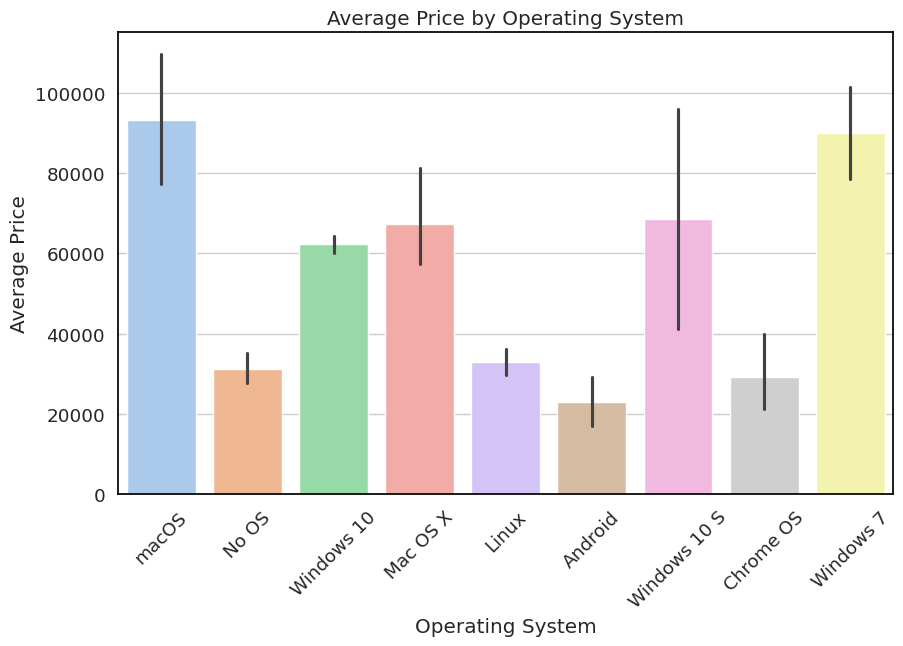

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'OpSys' and 'Price' are the columns you want to visualize

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='OpSys', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette

# Set plot labels and title
plt.title("Average Price by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Average Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Show the plot
plt.show()


In [62]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Other/Linux/No OS'

In [63]:
# Apply the 'cat_os' function to create a new column 'os' with categorized
data['os'] = data['OpSys'].apply(cat_os)
# Drop the 'OpSys' column using .loc to avoid SettingWithCopyWarning
data.drop(columns=['OpSys'],inplace = True)


<ipython-input-63-008dfc4672f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['os'] = data['OpSys'].apply(cat_os)
<ipython-input-63-008dfc4672f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['OpSys'],inplace = True)


In [64]:
# Display a sample of 9 random rows from the DataFrame
data.sample(9)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
716,Dell,Notebook,8,1.90,62817,0,0,141.211998,Intel Core i5,0,256,Intel,windows
21,Lenovo,Gaming,8,2.50,53226,0,1,141.211998,Intel Core i5,1000,128,Nvidia,windows
764,Dell,Notebook,4,1.65,45234,0,0,117.826530,Intel Core i3,500,0,Intel,windows
1097,MSI,Gaming,8,2.60,85194,0,0,127.335675,Intel Core i7,0,256,Nvidia,windows
1283,Asus,Notebook,4,2.20,38378,0,0,100.454670,Intel Core i7,500,0,Nvidia,windows
187,Lenovo,Gaming,8,2.40,41505,0,1,141.211998,Intel Core i5,0,256,Nvidia,Other/Linux/No OS
1070,Dell,Notebook,4,2.06,25679,0,0,100.454670,Intel Core i3,500,0,Intel,windows
655,Toshiba,Notebook,8,2.00,56689,0,1,141.211998,Intel Core i5,500,0,Intel,windows
1261,Asus,Ultrabook,8,1.20,38841,0,1,165.632118,Other Intel Processor,0,512,Intel,windows


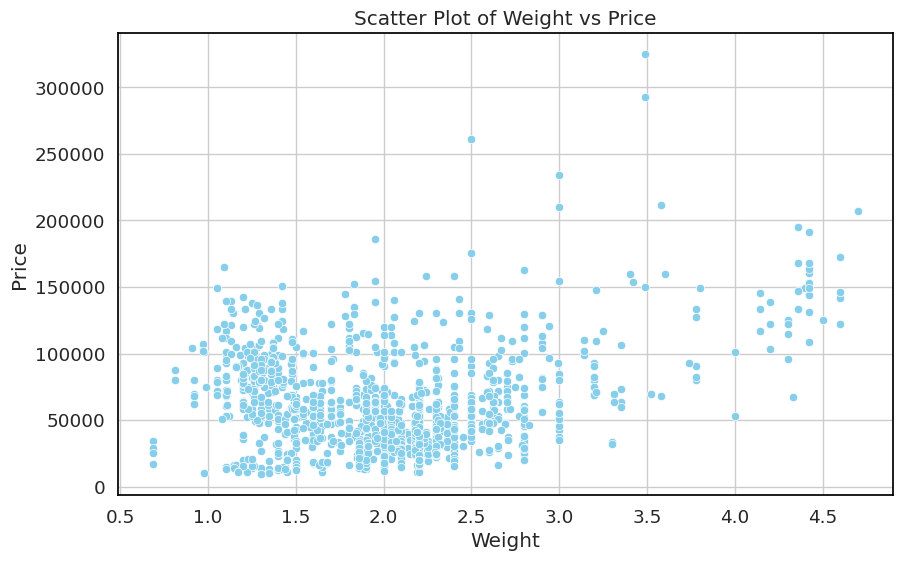

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Weight' and 'Price' are the columns you want to visualize

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the scatter plot using Seaborn's scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Price', data=data, color='skyblue')

# Set plot labels and title
plt.title("Scatter Plot of Weight vs Price")
plt.xlabel("Weight")
plt.ylabel("Price")
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


<ipython-input-66-89c3d16caada>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)


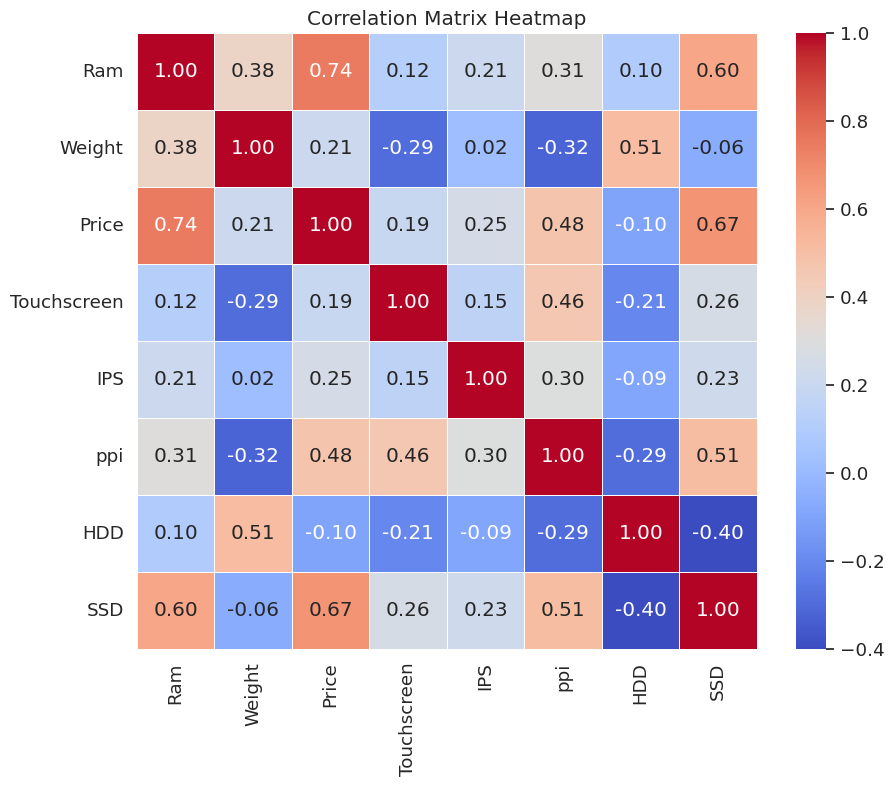

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the heatmap using Seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Set plot title
plt.title("Correlation Matrix Heatmap")
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


<ipython-input-67-5e15d2a6fb5a>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['Price']), kde=False, bins=30, color='skyblue', hist_kws=dict(edgecolor="k", linewidth=1))


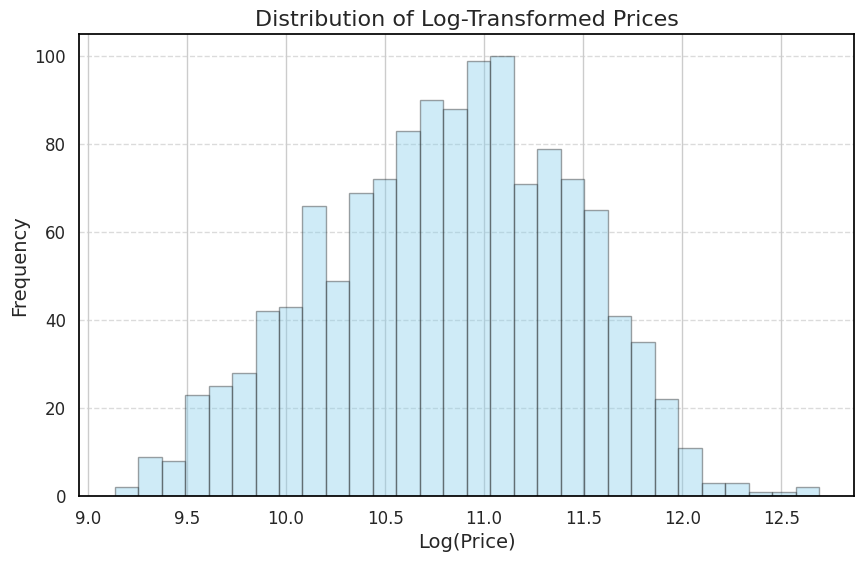

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame and 'Price' is the column you want to visualize

# Set a color palette
custom_palette = ["#3498db"]

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_palette(custom_palette)
sns.set_context("notebook", font_scale=1.2)

# Create the distribution plot with log-transformed Price
plt.figure(figsize=(10, 6))
sns.distplot(np.log(data['Price']), kde=False, bins=30, color='skyblue', hist_kws=dict(edgecolor="k", linewidth=1))

# Set plot labels and title
plt.title("Distribution of Log-Transformed Prices", fontsize=16)
plt.xlabel("Log(Price)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Customize x and y axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Display a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [68]:
# Create feature variables (x) by dropping the 'Price' column from the DataFrame
x = data.drop(columns=['Price'])
# Create the target variable (y) by taking the natural logarithm (log) of the 'Price' column
y = np.log(data['Price'])

In [69]:
# Display the feature variables DataFrame 'x'
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linux/No OS
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,windows


In [70]:
# Display the target variable 'y' (log-transformed prices)
y

0       11.175745
1       10.776766
2       10.329931
3       11.814473
4       11.473093
          ...    
1298    10.433880
1299    11.288106
1300     9.409273
1301    10.614106
1302     9.886341
Name: Price, Length: 1302, dtype: float64

In [71]:
# Import regression models from scikit-learn and XGBoost
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [72]:
# Import utilities for data preprocessing and model evaluation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [73]:
# Import function for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split as tts
# Split the dataset into features (x) and target variable (y)
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2, random_state=6227)




---


# **MODEL SELECTION**



---




> =============================================
> ## **Linear Regression**
> =============================================


In [74]:
# Define a ColumnTransformer for one-hot encoding categorical features
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
# Create a pipeline with one-hot encoding and Linear Regression
step2 = LinearRegression()
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
# Fit the pipeline on the training data
pipe.fit(x_train,y_train)
# Make predictions on the test data
y_pred = pipe.predict(x_test)
print("==========================================================")
# Evaluate the model's performance
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")


The R2 Score is:  0.8777441642057937
Mean Absolute Error(MAE) Score is:  0.18025727832178512


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



> =============================================
> ## **Ridge Regresssion**
> =============================================



In [75]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

The R2 Score is:  0.8639472376520967
Mean Absolute Error(MAE) Score is:  0.19083370351799295


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



> =============================================
> ## **K-Nearest Neighbors (KNN)**
> =============================================




In [76]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 Score is:  0.8204786256330097
Mean Absolute Error(MAE) Score is:  0.20932967042089515



> =============================================
> ## **Decision Tree**
> =============================================


In [77]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

The R2 Score is:  0.8509389248359206
Mean Absolute Error(MAE) Score is:  0.19069005948066572


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



> =============================================
> ## **Support Vector Machine (SVM)**
> =============================================


In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 Score is:  0.7903736139279589
Mean Absolute Error(MAE) Score is:  0.19442850069406467



> =============================================
> ## **Random Forest**
> =============================================


In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                                )
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 Score is:  0.910650195727257
Mean Absolute Error(MAE) Score is:  0.14888758885842143





---


> ### **The Random Forest Algorithms gives maximum R2 score**

---






> =============================================
> ## **Extra Tree**
> =============================================



In [80]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15
                                )
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 Score is:  0.9067889597080929
Mean Absolute Error(MAE) Score is:  0.15315984495533805



> =============================================
> ## **AdaBoost**
> =============================================


In [81]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,
                         learning_rate=1.0)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

The R2 Score is:  0.8006858523601876
Mean Absolute Error(MAE) Score is:  0.23982064551710455


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



> =============================================
> ## **Gradient Boost**
> =============================================



In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=100)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 Score is:  0.9020964495049811
Mean Absolute Error(MAE) Score is:  0.15584946883430248



> =============================================
> ## **Xgboost**
> =============================================



In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(max_depth=5,learning_rate=0.5)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

The R2 Score is:  0.908741877018749
Mean Absolute Error(MAE) Score is:  0.14589567640511486


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



> =============================================
> ## **Voting Regressor**
> =============================================

In [84]:
from sklearn.ensemble import VotingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)],weights=[5,1,1,1])
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 Score is:  0.9105565146660063
Mean Absolute Error(MAE) Score is:  0.14942685921936136


> ========================================================
> ### **Exporting model using random forest classifier**
> ========================================================

In [85]:
import pickle
# Save the trained pipeline (including the model) to a pickle file named 'pipe.pkl'
pickle.dump(pipe, open('pipe.pkl', 'wb'))
# Save the dataset to a pickle file named 'data.pkl'
pickle.dump(data, open('data.pkl', 'wb'))

In [86]:
# Display the dataset (assuming it is a pandas DataFrame)
data

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linux/No OS
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992,1,1,157.350512,Intel Core i7,0,128,Intel,windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866,1,1,276.053530,Intel Core i7,0,512,Intel,windows
1300,Lenovo,Notebook,2,1.50,12201,0,0,111.935204,Other Intel Processor,0,0,Intel,windows
1301,HP,Notebook,6,2.19,40705,0,0,100.454670,Intel Core i7,1000,0,AMD,windows


In [87]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [88]:
!pip install --upgrade streamlit


In [89]:
!curl https://loca.lt/mytunnelpassword #            34.73.204.88

35.243.251.156

In [90]:
! streamlit run main.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.243.251.156:8501

npx: installed 22 in 5.448s
your url is: https://deep-roses-smile.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
  Stopping...
^C
